# **Tugas 2 data_understanding**
## **Penjelasan Outlier Deteksi**
### **Deteksi Outlier dengan K-Nearest Neighbors (KNN) dalam Data Understanding**  
#### 1. Pengantar Outlier dalam Data Understanding
Outlier adalah data yang memiliki nilai ekstrem yang berbeda secara signifikan dari sebagian besar data dalam suatu dataset. Outlier dapat terjadi karena kesalahan pengukuran, anomali sistem, atau fenomena yang memang tidak biasa. Dalam proses Data Understanding, mendeteksi outlier sangat penting untuk memastikan bahwa analisis data dan model yang digunakan tidak dipengaruhi oleh nilai-nilai ekstrem yang dapat menyebabkan hasil yang bias atau tidak akurat.

#### 2. Konsep K-Nearest Neighbors (KNN) dalam Deteksi Outlier
Metode KNN untuk deteksi outlier bekerja berdasarkan prinsip bahwa:

Data normal cenderung memiliki tetangga yang lebih dekat karena mereka berada dalam kelompok yang lebih padat.
Outlier memiliki tetangga yang jauh karena mereka berbeda dari sebagian besar data lain dalam dataset.
Pendekatan yang umum digunakan dalam KNN untuk deteksi outlier melibatkan pengukuran jarak rata-rata ke k-tetangga terdekat dan menentukan apakah suatu titik data berada dalam distribusi normal atau tidak.

#### 3 . Pengertian Perhitungan K
Perhitungan K mengacu pada proses menentukan nilai K dalam berbagai konteks, tergantung pada bidang yang dibahas. Secara umum, K sering kali merepresentasikan jumlah, konstanta, atau parameter penting dalam suatu perhitungan atau algoritma.

Contoh penerapannya:

- Dalam Algoritma K-Nearest Neighbors (KNN):
Nilai K adalah jumlah tetangga terdekat yang dipertimbangkan untuk menentukan kelas atau nilai suatu data baru. Pemilihan K yang tepat sangat penting untuk menghindari overfitting atau underfitting.

- Dalam Statistika (Koefisien Kappa):
Mengukur kesepakatan antar penilai, membantu memahami seberapa konsisten dua atau lebih pengamat dalam memberikan penilaian.

- Dalam Fisika (Konstanta):
K bisa menjadi simbol untuk konstanta tertentu, seperti konstanta Boltzmann, yang menghubungkan energi kinetik partikel dengan suhu.

- Dalam Kimia (Konstanta Kesetimbangan):
Menghitung rasio konsentrasi produk dan reaktan pada kondisi setimbang dalam suatu reaksi kimia.

- Dalam Matematika dan Kombinatorika:
K sering digunakan untuk menyatakan jumlah elemen dalam kombinasi atau permutasi, seperti dalam rumus binomial.

#### Kapan Menggunakan KNN untuk Deteksi Outlier?
Data Berdimensi Tinggi: KNN bekerja cukup baik pada data berdimensi tinggi.

Data Tanpa Distribusi Tertentu: Tidak bergantung pada asumsi distribusi normal.

Jumlah Data yang Tidak Terlalu Besar: Karena KNN bisa lambat untuk dataset yang sangat besar (karena menghitung jarak berpasangan).


#### Kesimpulan
K-Nearest Neighbors (KNN) adalah metode berbasis jarak yang dapat digunakan untuk deteksi outlier dengan mengukur jarak rata-rata ke K tetangga terdekat.
KNN dapat mengidentifikasi titik yang memiliki jarak lebih besar dibandingkan sebagian besar data lain sebagai outlier.
Teknik ini sangat berguna dalam Data Understanding, terutama sebelum pemodelan data untuk memastikan kualitas data yang lebih baik.
Namun, metode ini dapat menjadi mahal secara komputasi untuk dataset besar dan memerlukan pemilihan parameter K yang optimal.

In [12]:
%pip install pymysql
%pip install psycopg2

#### Analisis Data & Koneksi Database

In [2]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.neighbors import NearestNeighbors

#### Mengambil Data dari PostgreSQL ke DataFrame Pandas dengan code di bawah ini

In [3]:
def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

#### Mengambil Data dari MySQL ke DataFrame Pandas dengan code di bawah ini

In [4]:
def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  1     Iris-setosa           1.4          0.2           5.1          3.5      0.133137    False
  2     Iris-setosa          14.0          2.0          40.9         30.0     43.258305     True
  3     Iris-setosa           1.3          0.2           4.7          3.2      0.236019    False
  4     Iris-setosa           1.5          0.2           4.6          3.1      0.209551    False
  5     Iris-setosa           1.4          0.2           5.0          3.6      0.191277    False
  6     Iris-setosa           1.7          0.4           5.4          3.9      0.360018    False
  7     Iris-setosa           1.4          0.3           4.6          3.4      0.284127    False
  8     Iris-setosa           1.5          0.2           5.0          3.4      0.167647    False
  9     Iris-setosa           1.4          0.2           4.4          2.9      0.292923    False
 10     Iris-setosa           

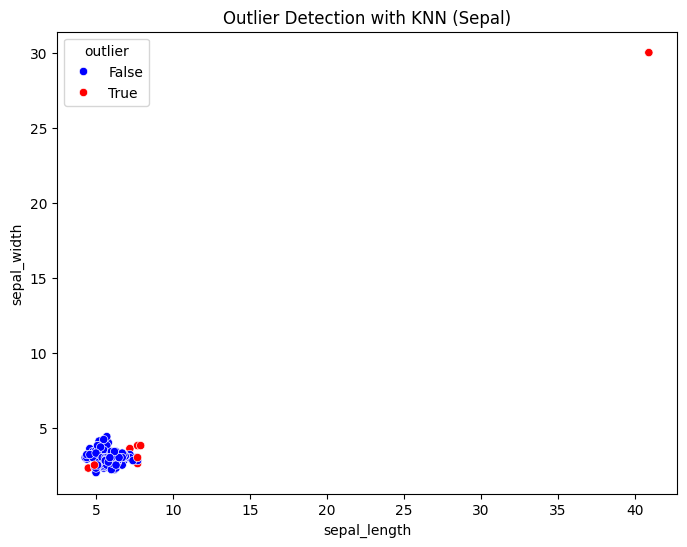

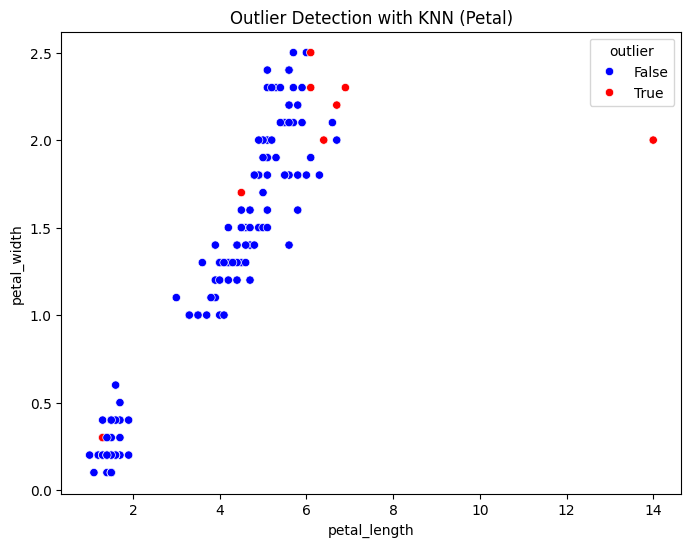

In [5]:
# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Gunakan KNN untuk mendeteksi outlier
K = 5  # Jumlah tetangga terdekat
nbrs = NearestNeighbors(n_neighbors=K+1, metric='euclidean').fit(data_values)
distances, indices = nbrs.kneighbors(data_values)

# Ambil rata-rata jarak ke K tetangga terdekat (tidak termasuk jarak ke dirinya sendiri)
df_merged["knn_distance"] = np.mean(distances[:, 1:], axis=1)

# Tentukan threshold outlier berdasarkan persentil ke-95
threshold = np.percentile(df_merged["knn_distance"], 95)
df_merged["outlier"] = df_merged["knn_distance"] > threshold

# Cetak hasil data dengan outlier
print(df_merged.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Petal)")
plt.show()


In [6]:
# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
print(f"Total Outlier: {total_outliers}")


Total Outlier: 8


In [7]:
# Menyaring data yang terdeteksi sebagai outlier
# Kemudian mengurutkannya berdasarkan nilai "knn_distance" dari yang terbesar
outliers = df_merged[df_merged["outlier"]].sort_values(by="knn_distance", ascending=False)

# Menampilkan daftar outlier teratas dalam format yang lebih rapi
print("Outlier Teratas:")
print(outliers.to_string(index=False))


Outlier Teratas:
 id          class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
  2    Iris-setosa          14.0          2.0          40.9         30.0     43.258305     True
132 Iris-virginica           6.4          2.0           7.9          3.8      0.836056     True
118 Iris-virginica           6.7          2.2           7.7          3.8      0.823174     True
107 Iris-virginica           4.5          1.7           4.9          2.5      0.810164     True
119 Iris-virginica           6.9          2.3           7.7          2.6      0.749237     True
 42    Iris-setosa           1.3          0.3           4.5          2.3      0.736302     True
110 Iris-virginica           6.1          2.5           7.2          3.6      0.714318     True
136 Iris-virginica           6.1          2.3           7.7          3.0      0.625559     True


 id           class  petal_length  petal_width  sepal_length  sepal_width  knn_distance  outlier
 74 Iris-versicolor           4.7          1.2           6.1          2.8      0.749557    False
 19     Iris-setosa           1.7          0.3           5.7          3.8      0.816976    False
119  Iris-virginica           6.9          2.3           7.7          2.6      2.534036     True
 79 Iris-versicolor           4.5          1.5           6.0          2.9      0.736805    False
 77 Iris-versicolor           4.8          1.4           6.8          2.8      0.868614    False
 32     Iris-setosa           1.5          0.4           5.4          3.4      0.563399    False
 65 Iris-versicolor           3.6          1.3           5.6          2.9      1.130517    False
142  Iris-virginica           5.1          2.3           6.9          3.1      1.167152    False
 69 Iris-versicolor           4.5          1.5           6.2          2.2      0.914372    False
 83 Iris-versicolor           

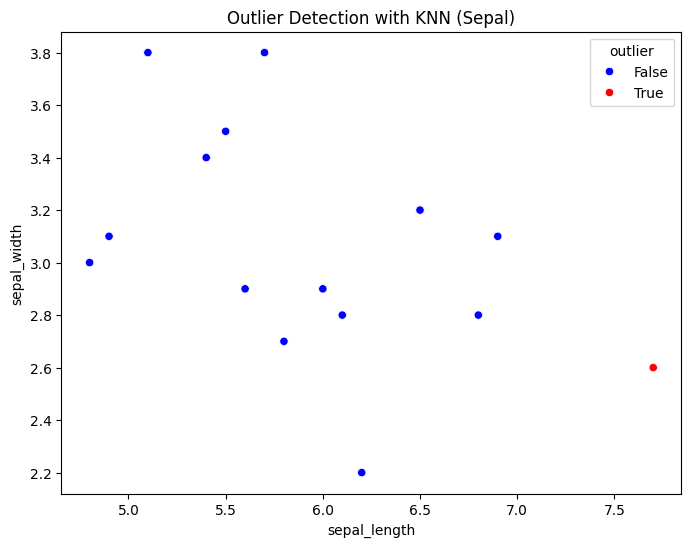

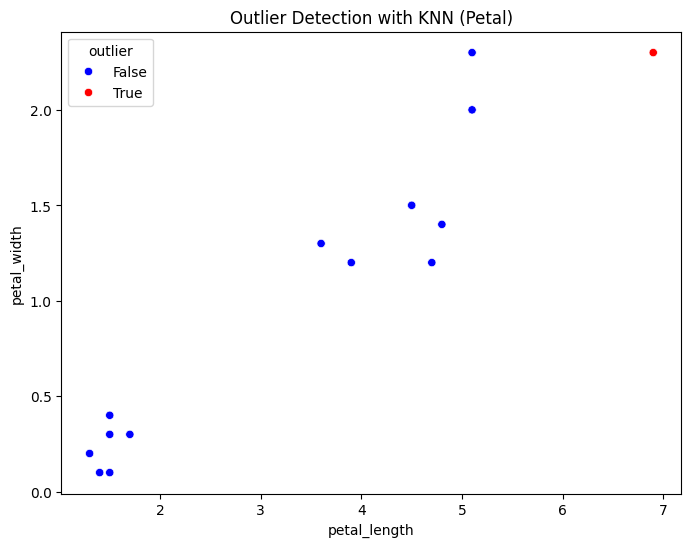

In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil 10% data secara acak
df_sampled = df_merged.sample(frac=0.1, random_state=42)

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_sampled[feature_columns].values

# Gunakan KNN untuk mendeteksi outlier
K = 5  # Jumlah tetangga terdekat
nbrs = NearestNeighbors(n_neighbors=K+1, metric='euclidean').fit(data_values)
distances, indices = nbrs.kneighbors(data_values)

# Ambil rata-rata jarak ke K tetangga terdekat (tidak termasuk jarak ke dirinya sendiri)
df_sampled["knn_distance"] = np.mean(distances[:, 1:], axis=1)

# Tentukan threshold outlier berdasarkan persentil ke-95
threshold = np.percentile(df_sampled["knn_distance"], 95)
df_sampled["outlier"] = df_sampled["knn_distance"] > threshold

# Cetak hasil data dengan outlier
print(df_sampled.to_string(index=False))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_sampled["sepal_length"], y=df_sampled["sepal_width"],
    hue=df_sampled["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Sepal)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_sampled["petal_length"], y=df_sampled["petal_width"],
    hue=df_sampled["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection with KNN (Petal)")
plt.show()




## **Memisahkan outlier dari data**

In [10]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay

def get_pg_data():
    conn = psycopg2.connect(
        host="postgre-mysqliris.g.aivencloud.com",
        user="avnadmin",
        password="AVNS_ldSz_mZZNFskZEWcZsJ",
        database="defaultdb",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-37a70601-mysqliris.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_3JRmZQG_Bul1_r-Rhl6",
        database="petal",
        port=10378
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petaliris")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]
    cursor.close()
    conn.close()
    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'class'
df_merge = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik tanpa kolom 'class'
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merge[feature_columns].values

# Inisialisasi model LOF
clf = LocalOutlierFactor(n_neighbors=90)
label = clf.fit_predict(data_values)

# Tambahkan hasil label ke dataframe
df_merge["outlier_label"] = label

# Cetak hasil dengan ID dan class
print(df_merge.to_string(index=False))

num_outliers = (label == -1).sum()
print(f"\nJumlah outlier: {num_outliers}")
df_filtered = df_merge[label == 1].drop(columns=["outlier_label"], errors='ignore')
outliers = df_merge[label == -1].drop(columns=["outlier_label"], errors='ignore')
print("\nData Outlier:")
print(outliers.to_string(index=False))
print("\nJumlah data setelah dihapus : ",len(df_filtered))
print("\nData tidak outlier :")
print(df_filtered.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width  outlier_label
  1     Iris-setosa           1.4          0.2           5.1          3.5              1
  2     Iris-setosa          14.0          2.0          40.9         30.0             -1
  3     Iris-setosa           1.3          0.2           4.7          3.2              1
  4     Iris-setosa           1.5          0.2           4.6          3.1              1
  5     Iris-setosa           1.4          0.2           5.0          3.6              1
  6     Iris-setosa           1.7          0.4           5.4          3.9              1
  7     Iris-setosa           1.4          0.3           4.6          3.4              1
  8     Iris-setosa           1.5          0.2           5.0          3.4              1
  9     Iris-setosa           1.4          0.2           4.4          2.9              1
 10     Iris-setosa           1.5          0.1           4.9          3.1              1
 11     Iris-setosa  

Kode ini bertujuan untuk mendeteksi serta memisahkan outlier dari dataset yang diperoleh dari dua sumber basis data, yaitu PostgreSQL dan MySQL. Proses dimulai dengan membangun koneksi ke kedua basis data menggunakan pustaka psycopg2 untuk PostgreSQL dan pymysql untuk MySQL, lalu menjalankan query guna mengambil seluruh data dari tabel iris_postgresql dan irismysql. Data yang diperoleh kemudian dikonversi menjadi DataFrame menggunakan pandas, lalu digabungkan berdasarkan kolom id dan class menggunakan metode inner join, sehingga hanya data yang terdapat di kedua tabel yang dipertahankan.

Selanjutnya, hanya fitur numerik seperti petal_length, petal_width, sepal_length, dan sepal_width yang digunakan dalam model deteksi outlier. Model Local Outlier Factor (LOF) dari scikit-learn diterapkan dengan parameter n_neighbors=90, yang berarti setiap titik data dibandingkan dengan 90 tetangga terdekatnya untuk menilai apakah titik tersebut merupakan outlier atau bukan. Model LOF memberikan label 1 untuk data yang dianggap normal dan -1 untuk data yang terdeteksi sebagai outlier.

Setelah LOF diterapkan, hasil deteksi outlier ditambahkan ke dalam DataFrame dengan kolom baru bernama outlier_label, lalu jumlah total outlier dihitung berdasarkan banyaknya data yang memiliki label -1. Dataset kemudian dipisahkan menjadi dua bagian: data normal (tidak termasuk outlier) yang memiliki label 1, disimpan dalam variabel df_filtered, serta data yang diklasifikasikan sebagai outlier (berlabel -1), disimpan dalam variabel outliers.

Hasil deteksi outlier kemudian ditampilkan dengan menampilkan dataset yang telah diberi label, jumlah total data yang dikategorikan sebagai outlier, serta daftar data yang termasuk dalam kategori outlier maupun data yang tetap setelah proses pembersihan. Dengan metode ini, outlier dapat diidentifikasi dan dihapus sebelum analisis lebih lanjut, sehingga meningkatkan kualitas data dan mengurangi potensi bias yang dapat memengaruhi hasil prediksi atau klasifikasi dalam model pembelajaran mesin.

## **Menghitung Akurasi dari data**

In [11]:
X = df_merged[feature_columns]
y = df_merged["class"]

# Encode label kelas ke numerik
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menerapkan LOF untuk deteksi outlier
lof = LocalOutlierFactor(n_neighbors=90, contamination=0.1)
outlier_labels = lof.fit_predict(X)
df_merged["outlier"] = outlier_labels

# Pisahkan data dengan outlier dan tanpa outlier
df_cleaned = df_merged[df_merged["outlier"] == 1].drop(columns=["outlier"])

# Membagi data menjadi training (80%) dan testing (20%)
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    df_cleaned[feature_columns],
    label_encoder.transform(df_cleaned["class"]),
    test_size=0.2,
    random_state=42
)

# Pipeline dengan StandardScaler dan KNN
knn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=11))
])

# Latih model pada data dengan outlier
knn_pipeline.fit(X_train_all, y_train_all)
y_pred_all = knn_pipeline.predict(X_test_all)
accuracy_all = accuracy_score(y_test_all, y_pred_all)
print("Akurasi dengan outlier:", accuracy_all)
print(classification_report(y_test_all, y_pred_all, target_names=label_encoder.classes_))

# Latih model pada data tanpa outlier
knn_pipeline.fit(X_train_clean, y_train_clean)
y_pred_clean = knn_pipeline.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
print("Akurasi tanpa outlier:", accuracy_clean)
print(classification_report(y_test_clean, y_pred_clean, target_names=label_encoder.classes_))

Akurasi dengan outlier: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Akurasi tanpa outlier: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        27
      macro avg       1.00      1.00      1.00        27
   weighted avg       1.00      1.00      1.00        27



Kode ini bertujuan untuk mengevaluasi perbandingan akurasi serta hasil klasifikasi model K-Nearest Neighbors (KNN) pada dataset yang masih mengandung outlier dan yang telah melalui proses pembersihan dari outlier. Proses diawali dengan mengekstrak fitur numerik yang akan digunakan dalam pemodelan dari DataFrame yang telah digabungkan sebelumnya, serta mengonversi label kelas menjadi format numerik menggunakan LabelEncoder. Model Local Outlier Factor (LOF) diterapkan kembali dengan parameter n_neighbors=90 dan contamination=0.1, yang mengindikasikan bahwa sekitar 10% data akan diidentifikasi sebagai outlier. Hasil deteksi outlier kemudian ditambahkan ke dalam DataFrame, lalu dataset dipisahkan menjadi dua kelompok: data asli yang masih mengandung outlier dan data yang telah dibersihkan dari outlier.

Langkah berikutnya adalah membagi kedua dataset menjadi data pelatihan (80%) dan data pengujian (20%) menggunakan train_test_split, sehingga diperoleh dua set pelatihan dan pengujian—satu dengan outlier dan satu tanpa outlier. Model KNN dengan jumlah tetangga sebanyak 11 diterapkan menggunakan Pipeline, yang terlebih dahulu melakukan standarisasi data menggunakan StandardScaler sebelum melatih model KNN. Model pertama dilatih menggunakan data yang masih mengandung outlier, kemudian hasil prediksi pada data uji dibandingkan dengan label aslinya untuk menghitung akurasi serta menampilkan classification report, yang mencakup metrik seperti precision, recall, dan F1-score untuk setiap kelas. Proses yang sama diterapkan pada dataset yang telah dibersihkan dari outlier.

Sebagai output, kode ini menghasilkan dua nilai akurasi: satu untuk model yang dilatih pada data dengan outlier dan satu untuk model yang dilatih pada data tanpa outlier. Selain itu, laporan klasifikasi ditampilkan untuk menilai dampak keberadaan outlier terhadap performa model. Secara umum, model yang dilatih pada data tanpa outlier diperkirakan memiliki akurasi lebih tinggi, karena keberadaan outlier dapat mengganggu perhitungan jarak pada KNN dan menyebabkan prediksi yang kurang akurat. Dengan membandingkan kedua hasil ini, pengguna dapat memahami sejauh mana pengaruh outlier terhadap performa klasifikasi serta menentukan apakah pembersihan data memberikan dampak positif terhadap akurasi model.